In [321]:
import sys
sys.path.append('../')

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from architectures.LeNet5 import LeNet5, SubSamplingLayer, C3Conv2DLayer
from src.helpers import Device, train
from src.metrics import Accuracy

import matplotlib.pyplot as plt
%matplotlib inline 

In [309]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [310]:
# parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 1

IMG_SIZE = 32
N_CLASSES = 10

In [311]:
# define transforms
transforms = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

In [312]:
# download and create datasets
train_dataset = datasets.MNIST(root='./mnist_data', 
                               train=True, 
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='./mnist_data', 
                               train=False, 
                               transform=transforms)

In [313]:
# define the data loaders
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True,num_workers=5)

valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=1100*BATCH_SIZE, 
                          shuffle=False,num_workers=5)

In [314]:
batch, y = next(iter(train_loader))
batch.shape

torch.Size([32, 1, 32, 32])

# Training

In [315]:
torch.manual_seed(RANDOM_SEED)
device = Device().get()
model = LeNet5(N_CLASSES).to(device)

In [316]:
model

LeNet5(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Atanh()
    (2): SubSamplingLayer(
      (conv): Conv2d(6, 6, kernel_size=(1, 1), stride=(1, 1), groups=6)
    )
    (3): Sigmoid()
    (4): C3Conv2DLayer(
      (conv): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    )
    (5): Atanh()
    (6): SubSamplingLayer(
      (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), groups=16)
    )
    (7): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (8): Atanh()
  )
  (classifier): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Atanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [317]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

In [ ]:
model, optimizer, (train_losses, valid_losses) = train(model, criterion, optimizer, train_loader, valid_loader, 40, device, eval_metrics=[Accuracy()])

21:14:30 --- Epoch: 0	Train loss: 0.2755	Valid loss: 0.1104	Accuracy: 0.9692	Validation Accuracy: 0.9660
21:15:15 --- Epoch: 1	Train loss: 0.0881	Valid loss: 0.0586	Accuracy: 0.9845	Validation Accuracy: 0.9814


08:59:14 --- Epoch: 0	Train loss: 0.2311	Valid loss: 0.0891	Accuracy: 0.9746	Validation Accuracy: 0.9726
08:59:46 --- Epoch: 1	Train loss: 0.0799	Valid loss: 0.0787	Accuracy: 0.9782	Validation Accuracy: 0.9763
09:00:19 --- Epoch: 2	Train loss: 0.0564	Valid loss: 0.0535	Accuracy: 0.9884	Validation Accuracy: 0.9832
09:00:50 --- Epoch: 3	Train loss: 0.0448	Valid loss: 0.0508	Accuracy: 0.9875	Validation Accuracy: 0.9833
09:01:27 --- Epoch: 4	Train loss: 0.0365	Valid loss: 0.0518	Accuracy: 0.9918	Validation Accuracy: 0.9851
09:01:59 --- Epoch: 5	Train loss: 0.0309	Valid loss: 0.0490	Accuracy: 0.9917	Validation Accuracy: 0.9852
09:02:29 --- Epoch: 6	Train loss: 0.0264	Valid loss: 0.0460	Accuracy: 0.9943	Validation Accuracy: 0.9861
09:03:00 --- Epoch: 7	Train loss: 0.0224	Valid loss: 0.0480	Accuracy: 0.9955	Validation Accuracy: 0.9866
09:03:31 --- Epoch: 8	Train loss: 0.0199	Valid loss: 0.0451	Accuracy: 0.9960	Validation Accuracy: 0.9880
09:04:01 --- Epoch: 9	Train loss: 0.0168	Valid loss: 0.

../src/helpers.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


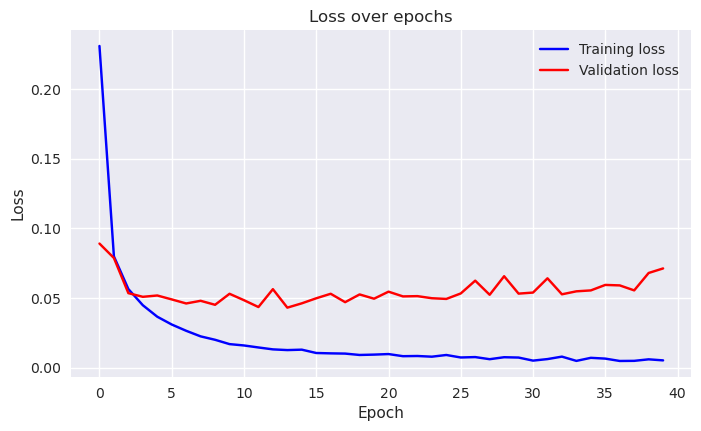

In [118]:
model, optimizer, (train_losses, valid_losses) = train(model, criterion, optimizer, train_loader, valid_loader, 40, device, eval_metrics=[Accuracy()])

In [1]:
def between(string, start, end):
    startAt = string.find(start) + len(start)
    endAt = string.find(end)
    return string[startAt:endAt]

In [220]:
vvx_energy_strom = pd.read_excel('~/Downloads/data_VERIVOX_ENERGY_STROM_full-4.xlsx', engine='openpyxl')
print(vvx_energy_strom.shape)
vvx_energy_banking = pd.read_excel('~/Downloads/data_VERIVOX_BANKING_full-4.xlsx', engine='openpyxl')
print(vvx_energy_banking.shape)
vvx_selected_wbnr = pd.concat([vvx_energy_banking, vvx_energy_strom])
print(vvx_selected_wbnr.shape)

(212, 16)
(137, 16)
(349, 16)


In [221]:
vvx_energy_strom.head()

,rank,Sender,KW,WT,Datum,Zeit,Sek.,Stunde,Produkt/Vertical,Werbetraeger,WB-Nr.(8),Umfeld vor,Umfeld nach,Scharnier(ja/nein),Bruttopreis,Zeitschiene
0,1,SIXX,7,Fr,19.02.2021,2021-02-19 11:58:47.080,15,11,STROM,VERIVOX GmbH,02.06.11.27,Royal Pains,Royal Pains,nein,162,09-13
1,2,SIXX,7,Fr,19.02.2021,2021-02-19 10:52:11.080,15,10,STROM,VERIVOX GmbH,02.06.10.24,Royal Pains,Royal Pains,nein,162,09-13
2,3,SIXX,7,Fr,19.02.2021,2021-02-19 12:55:44.080,15,12,STROM,VERIVOX GmbH,02.08.12.31,Charmed,Charmed,nein,234,09-13
3,4,SIXX,7,So,21.02.2021,2021-02-21 11:10:15.440,15,11,STROM,VERIVOX GmbH,02.23.11.25,Fixer Upper,Fixer Upper,nein,1152,09-13
4,5,SIXX,7,So,21.02.2021,2021-02-21 12:05:07.520,15,12,STROM,VERIVOX GmbH,02.25.12.29,Fixer Upper,Fixer Upper,nein,1278,09-13


In [222]:
clmns = ['WB-Nr.(8)', 'Zeit', 'Sender', 'Datum']
vvx_selected_wbnr[clmns].to_csv('~/Downloads/ALREADY_BOOKED_SPOTS.csv')
vvx_energy_strom[clmns].to_csv('~/Downloads/booked_vvx_energy_strom.csv')
vvx_energy_banking[clmns].to_csv('~/Downloads/booked_vvx_energy_banking.csv')

In [223]:
prediction_df = pd.read_csv('~/Downloads/data-16.csv')
prediction_df.shape

(1879, 46)

In [224]:
prediction_df['t_blockanfangszeit'] = pd.to_datetime(prediction_df['t_blockanfangszeit'])
prediction_df['Zeit'] = pd.to_datetime(prediction_df['t_blockanfangszeit'])
prediction_df["Datum"] = pd.to_datetime(prediction_df['t_blockanfangszeit']).dt.strftime('%d.%m.%Y')

prediction_df["gfk_nr"] = prediction_df['gfk_nr'].astype(int).astype(str).apply(lambda x: x.zfill(8))
prediction_df["WB-Nr.(8)"] = prediction_df['gfk_nr'].apply(lambda x: x[0:2] + '.' + x[2:4] + '.' + x[4:6] + '.' + x[6:8])

In [242]:
output = prediction_df.merge(vvx_selected_wbnr, left_on=["WB-Nr.(8)", 'Datum', 'hwt_name', 'campaign'], right_on=["WB-Nr.(8)", 'Datum', 'Sender', 'Produkt/Vertical'])
output.shape

(204, 63)

In [240]:
leftovers = vvx_selected_wbnr.merge(output[["WB-Nr.(8)", 'Datum', 'hwt_name', 'campaign', 'tv_insel']], right_on=["WB-Nr.(8)", 'Datum', 'hwt_name', 'campaign'], left_on=["WB-Nr.(8)", 'Datum', 'Sender', 'Produkt/Vertical'],how="outer", indicator=True)
leftovers[leftovers['_merge'] == 'left_only']

,rank,Sender,KW,WT,Datum,Zeit,Sek.,Stunde,Produkt/Vertical,Werbetraeger,WB-Nr.(8),Umfeld vor,Umfeld nach,Scharnier(ja/nein),Bruttopreis,Zeitschiene,hwt_name,campaign,tv_insel,_merge
5,6,SIXX,7,Mo,15.02.2021,2021-02-15 11:53:56.240000,10,11,BANKING,VERIVOX GmbH,02.06.11.26,Royal Pains,Royal Pains,nein,108,09-13,NaN,NaN,NaN,left_only
8,9,SAT.1,7,Mo,15.02.2021,2021-02-15 10:19:48.000000,10,10,BANKING,VERIVOX GmbH,01.17.10.22,Im Namen der Gerechtigkeit,Im Namen der Gerechtigkeit,nein,996,09-13,NaN,NaN,NaN,left_only
9,10,SAT.1,7,Do,18.02.2021,2021-02-18 13:19:32.999999,10,13,BANKING,VERIVOX GmbH,01.21.13.33,Auf Streife,Auf Streife,nein,1224,13-17,NaN,NaN,NaN,left_only
10,11,SAT.1,7,Mo,15.02.2021,2021-02-15 13:19:09.000000,10,13,BANKING,VERIVOX GmbH,01.21.13.33,Auf Streife,Auf Streife,nein,1224,13-17,NaN,NaN,NaN,left_only
11,12,SIXX,7,Mi,17.02.2021,2021-02-17 11:41:38.440000,10,11,BANKING,VERIVOX GmbH,02.06.11.26,Royal Pains,Royal Pains,nein,108,09-13,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,199,KABEL EINS,7,Mo,15.02.2021,2021-02-15 20:11:10.000000,15,20,STROM,VERIVOX GmbH,01.43.20.61,Achtung Kontrolle! Wir kümmern uns drum,Wolverine: Weg des Kriegers,ja,5472,20-23,NaN,NaN,NaN,left_only
340,204,SAT.1,7,Mo,15.02.2021,2021-02-15 22:37:39.000000,15,22,STROM,VERIVOX GmbH,01.55.22.71,akte.,akte.,nein,9882,20-23,NaN,NaN,NaN,left_only
342,206,KABEL EINS DOKU,7,Mi,17.02.2021,2021-02-17 22:26:40.400001,15,22,STROM,VERIVOX GmbH,03.28.22.71,Homicide Hunter,Homicide Hunter,nein,1476,20-23,NaN,NaN,NaN,left_only
344,208,KABEL EINS DOKU,7,Di,16.02.2021,2021-02-16 20:45:16.000000,15,20,STROM,VERIVOX GmbH,03.23.20.64,Unerklärliche Phänomene,Unerklärliche Phänomene,nein,1152,20-23,NaN,NaN,NaN,left_only


In [253]:
df_prediction_15 = pd.read_csv('~/Downloads/data-15.csv')
df_prediction_15 = df_prediction_15[(df_prediction_15.ma_name == 'VERIVOX') & (df_prediction_15.vertical.isin(['ENERGY', 'BANKING']))]
df_prediction_15['t_blockanfangszeit'] = pd.to_datetime(df_prediction_15['t_blockanfangszeit'])
df_prediction_15['Zeit'] = pd.to_datetime(df_prediction_15['t_blockanfangszeit'])
df_prediction_15["Datum"] = pd.to_datetime(df_prediction_15['t_blockanfangszeit']).dt.strftime('%d.%m.%Y')
df_prediction_15['Produkt/Vertical'] = df_prediction_15.vertical.apply(lambda x: "BANKING" if x == 'BANKING' else 'STROM')

df_prediction_15["gfk_nr"] = df_prediction_15['gfk_nr'].astype(int).astype(str).apply(lambda x: x.zfill(8))
df_prediction_15["WB-Nr.(8)"] = df_prediction_15['gfk_nr'].apply(lambda x: x[0:2] + '.' + x[2:4] + '.' + x[4:6] + '.' + x[6:8])

In [255]:
df_prediction_15.merge(leftovers[leftovers['_merge'] == 'left_only'], left_on=["WB-Nr.(8)", 'Datum', 'hwt_name', 'Produkt/Vertical', 't_spotlaenge'], right_on=["WB-Nr.(8)", 'Datum', 'Sender', 'Produkt/Vertical', 'Sek.'],how="inner")

,broad_genre,hwt_name_x,if_wkz,ma_name,vertical,block_market_share_mio,day_cos,day_sin,megablock_len,month_cos,...,Werbetraeger,Umfeld vor,Umfeld nach,Scharnier(ja/nein),Bruttopreis,Zeitschiene,hwt_name_y,campaign,tv_insel_y,_merge
0,Sitcom,PROSIEBEN,False,VERIVOX,ENERGY,0.031253,-0.210278,0.977642,1567,-0.997974,...,VERIVOX GmbH,Two and a Half Men,Two and a Half Men,nein,432,06-09,NaN,NaN,NaN,left_only
1,Sitcom,PROSIEBEN,False,VERIVOX,BANKING,0.032200,-0.320081,0.947390,1596,-0.997707,...,VERIVOX GmbH,Two and a Half Men,Two and a Half Men,nein,348,06-09,NaN,NaN,NaN,left_only
2,Comedy,PROSIEBEN,False,VERIVOX,BANKING,0.133612,-0.997723,0.067438,1539,-0.993979,...,VERIVOX GmbH,Scrubs,Scrubs,nein,1284,09-13,NaN,NaN,NaN,left_only
3,Sitcom,PROSIEBEN,False,VERIVOX,BANKING,0.165687,-0.987466,-0.157833,1599,-0.993063,...,VERIVOX GmbH,Last Man Standing,Last Man Standing,nein,1572,09-13,NaN,NaN,NaN,left_only
4,Sitcom,PROSIEBEN,False,VERIVOX,ENERGY,0.265814,-0.805354,-0.592794,1655,-0.990920,...,VERIVOX GmbH,Two and a Half Men,Two and a Half Men,nein,3690,13-17,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Documentary,KABEL EINS DOKU,False,VERIVOX,ENERGY,0.049086,-0.780812,-0.624766,2799,-0.087985,...,VERIVOX GmbH,Mountain Men,Mountain Men,nein,414,13-17,NaN,NaN,NaN,left_only
141,Documentary,KABEL EINS DOKU,False,VERIVOX,ENERGY,0.053354,-0.326305,-0.945264,2792,-0.067919,...,VERIVOX GmbH,Mountain Men,Mountain Men,nein,414,13-17,NaN,NaN,NaN,left_only
142,Documentary,KABEL EINS DOKU,False,VERIVOX,ENERGY,0.055956,-0.107302,-0.994226,2823,-0.059904,...,VERIVOX GmbH,Mountain Men,Mountain Men,nein,486,17-20,NaN,NaN,NaN,left_only
143,Documentary,KABEL EINS DOKU,False,VERIVOX,ENERGY,0.049563,0.097655,-0.995220,2855,-0.052582,...,VERIVOX GmbH,Mountain Men,Mountain Men,nein,486,17-20,NaN,NaN,NaN,left_only


In [160]:
full_blocks_sh1 = pd.read_excel('~/Downloads/TopSpot_keine Freilänge_KW7_Energy+Banking[3].xlsx', engine='openpyxl', sheet_name='Fehlerprotokoll Energy')
full_blocks_sh1 = full_blocks_sh1.dropna()
full_blocks_sh2 = pd.read_excel('~/Downloads/TopSpot_keine Freilänge_KW7_Energy+Banking[3].xlsx', engine='openpyxl', sheet_name='Fehlerprotokoll Banking')
full_blocks_sh2 = full_blocks_sh2.dropna()

In [161]:
full_blocks_sh1.tail()

,Product,Campaign,Station,Date,Time,TSB,Dauer,Auftrag,Deal,Message
43,Energy,Energy 2021,SAT.1,2021-02-20,08:44:36,01\19\08\15,15.0,1033106137898P1 Verivox NCG Energy 2021 Direk...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...
44,Energy,Energy 2021,SAT.1,2021-02-20,18:41:48,01\39\18\55,15.0,1033106137898P1 Verivox NCG Energy 2021 Direk...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...
45,Energy,Energy 2021,SAT.1 GOLD,2021-02-15,16:11:35,02\17\16\48,15.0,1033106137898P2 Verivox NCG Energy 2021 Direk...,Direktbuchung 2,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...
46,Energy,Energy 2021,SAT.1 GOLD,2021-02-15,17:48:07,02\25\17\51,15.0,1033106137898P2 Verivox NCG Energy 2021 Direk...,Direktbuchung 2,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...
47,Energy,Energy 2021,SAT.1 GOLD,2021-02-17,17:48:18,02\25\17\51,15.0,1033106137898P1 Verivox NCG Energy 2021 Direk...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...


In [162]:
full_blocks_sh2.tail()

,Product,Campaign,Station,Date,Time,TSB,Dauer,Auftrag,Deal,Message
23,Banking,Banking 2021,SAT.1,2021-02-17,12:41:34,01\16\12\31,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...
24,Banking,Banking 2021,SAT.1,2021-02-17,23:41:12,01\33\23\74,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...
25,Banking,Banking 2021,SAT.1,2021-02-18,13:19:33,01\21\13\33,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...
26,Banking,Banking 2021,SAT.1 GOLD,2021-02-17,18:39:41,02\28\18\55,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...
27,Banking,Banking 2021,SAT.1 GOLD,2021-02-18,23:42:38,02\13\23\75,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...


In [169]:
full_blocks = pd.concat([full_blocks_sh1, full_blocks_sh2])
full_blocks.shape

(76, 10)

In [168]:
full_blocks.to_csv('~/Downloads/full_blocks_wavemaker.csv')

In [273]:
full_blocks['Sender'] = full_blocks.Station.str.upper()
full_blocks['Datum'] = pd.to_datetime(full_blocks.Date).dt.strftime('%d.%m.%Y')
full_blocks['Sek.'] = full_blocks.Dauer
full_blocks['Produkt/Vertical'] = full_blocks.Product.str.upper()
full_blocks['Produkt/Vertical'] = full_blocks['Produkt/Vertical'].apply(lambda x: "BANKING" if x == 'BANKING' else 'STROM')
full_blocks["WB-Nr.(8)"] = full_blocks.TSB.str.replace('\\','.')

In [274]:
full_blocks

,Product,Campaign,Station,Date,Time,TSB,Dauer,Auftrag,Deal,Message,Sender,Datum,Sek.,Produkt/Vertical,WB-Nr.(8)
0,Energy,Energy 2021,Kabel Eins,2021-02-15,09:39:32,01\07\09\19,15.0,1033106137898P2 Verivox NCG Energy 2021 Direk...,Direktbuchung 2,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,KABEL EINS,15.02.2021,15.0,STROM,01.07.09.19
1,Energy,Energy 2021,Kabel Eins,2021-02-15,11:49:58,01\15\11\28,15.0,1033106137898P2 Verivox NCG Energy 2021 Direk...,Direktbuchung 2,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,KABEL EINS,15.02.2021,15.0,STROM,01.15.11.28
2,Energy,Energy 2021,Kabel Eins,2021-02-15,20:11:10,01\43\20\61,15.0,1033106137898P2 Verivox NCG Energy 2021 Direk...,Direktbuchung 2,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,KABEL EINS,15.02.2021,15.0,STROM,01.43.20.61
3,Energy,Energy 2021,Kabel Eins,2021-02-19,16:30:39,01\20\16\47,15.0,1033106137898P1 Verivox NCG Energy 2021 Direk...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,KABEL EINS,19.02.2021,15.0,STROM,01.20.16.47
4,Energy,Energy 2021,Kabel Eins,2021-02-19,19:15:01,03\36\19\58,15.0,1033106137898P1 Verivox NCG Energy 2021 Direk...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,KABEL EINS,19.02.2021,15.0,STROM,03.36.19.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,Banking,Banking 2021,SAT.1,2021-02-17,12:41:34,01\16\12\31,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,SAT.1,17.02.2021,10.0,BANKING,01.16.12.31
24,Banking,Banking 2021,SAT.1,2021-02-17,23:41:12,01\33\23\74,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,SAT.1,17.02.2021,10.0,BANKING,01.33.23.74
25,Banking,Banking 2021,SAT.1,2021-02-18,13:19:33,01\21\13\33,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,SAT.1,18.02.2021,10.0,BANKING,01.21.13.33
26,Banking,Banking 2021,SAT.1 GOLD,2021-02-17,18:39:41,02\28\18\55,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,SAT.1 GOLD,17.02.2021,10.0,BANKING,02.28.18.55


In [276]:
full_blocks.merge(vvx_selected_wbnr, left_on=["WB-Nr.(8)", 'Datum', 'Sender', 'Produkt/Vertical', 'Sek.'], right_on=["WB-Nr.(8)", 'Datum', 'Sender', 'Produkt/Vertical', 'Sek.'])

,Product,Campaign,Station,Date,Time,TSB,Dauer,Auftrag,Deal,Message,...,KW,WT,Zeit,Stunde,Werbetraeger,Umfeld vor,Umfeld nach,Scharnier(ja/nein),Bruttopreis,Zeitschiene
0,Energy,Energy 2021,Kabel Eins,2021-02-15,09:39:32,01\07\09\19,15.0,1033106137898P2 Verivox NCG Energy 2021 Direk...,Direktbuchung 2,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,...,7,Mo,2021-02-15 09:39:32.279999,9,VERIVOX GmbH,Blue Bloods,Blue Bloods,nein,612,09-13
1,Energy,Energy 2021,Kabel Eins,2021-02-15,11:49:58,01\15\11\28,15.0,1033106137898P2 Verivox NCG Energy 2021 Direk...,Direktbuchung 2,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,...,7,Mo,2021-02-15 11:49:58.440000,11,VERIVOX GmbH,Castle,Castle,nein,1332,09-13
2,Energy,Energy 2021,Kabel Eins,2021-02-15,20:11:10,01\43\20\61,15.0,1033106137898P2 Verivox NCG Energy 2021 Direk...,Direktbuchung 2,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,...,7,Mo,2021-02-15 20:11:10.000000,20,VERIVOX GmbH,Achtung Kontrolle! Wir kümmern uns drum,Wolverine: Weg des Kriegers,ja,5472,20-23
3,Energy,Energy 2021,Kabel Eins,2021-02-19,16:30:39,01\20\16\47,15.0,1033106137898P1 Verivox NCG Energy 2021 Direk...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,...,7,Fr,2021-02-19 16:30:39.680000,16,VERIVOX GmbH,Navy CIS,Navy CIS,nein,1728,13-17
4,Energy,Energy 2021,Kabel Eins,2021-02-19,19:15:01,03\36\19\58,15.0,1033106137898P1 Verivox NCG Energy 2021 Direk...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,...,7,Fr,2021-02-19 19:15:01.400000,19,VERIVOX GmbH,Achtung Kontrolle! Wir kümmern uns drum,Achtung Kontrolle! Wir kümmern uns drum,nein,3888,17-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Banking,Banking 2021,SAT.1,2021-02-17,12:41:34,01\16\12\31,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,...,7,Mi,2021-02-17 12:41:34.000000,12,VERIVOX GmbH,Klinik am Südring,Klinik am Südring,nein,936,09-13
72,Banking,Banking 2021,SAT.1,2021-02-17,23:41:12,01\33\23\74,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,...,7,Mi,2021-02-17 23:41:12.000000,23,VERIVOX GmbH,Promis backen privat,Promis backen privat,nein,2232,23-00
73,Banking,Banking 2021,SAT.1,2021-02-18,13:19:33,01\21\13\33,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,...,7,Do,2021-02-18 13:19:32.999999,13,VERIVOX GmbH,Auf Streife,Auf Streife,nein,1224,13-17
74,Banking,Banking 2021,SAT.1 GOLD,2021-02-17,18:39:41,02\28\18\55,10.0,1033106135444P1 Verivox NCG Banking 2021 Dire...,Direktbuchung 1,SOM: Fehlercode OBSVM5012: Freilänge nicht aus...,...,7,Mi,2021-02-17 18:39:41.600001,18,VERIVOX GmbH,Mord ist ihr Hobby,Mord ist ihr Hobby,nein,984,17-20


In [277]:
349-76

273